# Week 06: Business Statistics & Analytics - E-commerce Analysis

## Learning Objectives
By the end of this exercise, you will be able to:
- Calculate key business metrics using pandas
- Create meaningful visualizations for business insights
- Apply statistical concepts to real business scenarios
- Make data-driven recommendations

---

## Business Context

You're working as a Data Analyst for **TechMart**, an e-commerce company. Your manager needs insights from last quarter's sales data to inform strategic decisions for the upcoming quarter.

Your analysis will help answer critical questions about customer behavior, regional performance, and product trends that directly impact business growth.

## Dataset Setup

First, let's generate the synthetic dataset you'll be analyzing:

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed for reproducible results
np.random.seed(42)

# Generate 500 orders from 2023
n_orders = 500

# Create order IDs and customer data
order_id = np.arange(1, n_orders + 1)
customer_id = np.random.randint(1, 101, size=n_orders)
customer_segment = np.random.choice(["Student", "Professional", "Senior"], size=n_orders, p=[0.4, 0.4, 0.2])
region = np.random.choice(["North", "South", "East", "West"], size=n_orders)
order_date = pd.date_range(start="2023-01-01", periods=n_orders, freq="D")
product_category = np.random.choice(["Electronics", "Clothing", "Books", "Home", "Sports"], size=n_orders)
quantity = np.random.randint(1, 5, size=n_orders)
unit_price = np.round(np.random.uniform(10, 200, size=n_orders), 2)
revenue = quantity * unit_price
discount_applied = np.random.choice([0, 5, 10, 15, 20, 25, 30], size=n_orders, p=[0.5,0.1,0.1,0.1,0.05,0.05,0.1])
payment_method = np.random.choice(["Credit Card", "PayPal", "Gift Card", "Debit Card"], size=n_orders)

# Build dataframe
df = pd.DataFrame({
    "order_id": order_id,
    "customer_id": customer_id,
    "customer_segment": customer_segment,
    "region": region,
    "order_date": order_date,
    "product_category": product_category,
    "quantity": quantity,
    "unit_price": unit_price,
    "revenue": revenue,
    "discount_applied": discount_applied,
    "payment_method": payment_method
})

# Save dataset for reference
df.to_csv("ecommerce_data.csv", index=False)
print("✅ Dataset created successfully!")

# Display first few rows
df.head()

✅ Dataset created successfully!


,order_id,customer_id,customer_segment,region,order_date,product_category,quantity,unit_price,revenue,discount_applied,payment_method
0,1,52,Student,North,2023-01-01,Clothing,1,42.43,42.43,0,Debit Card
1,2,93,Student,West,2023-01-02,Sports,1,24.18,24.18,0,Gift Card
2,3,15,Professional,East,2023-01-03,Sports,3,158.71,476.13,0,Debit Card
3,4,72,Student,East,2023-01-04,Sports,1,60.42,60.42,0,Credit Card
4,5,61,Student,West,2023-01-05,Books,3,43.78,131.34,0,Gift Card


## Data Exploration

Let's start by understanding our dataset:

In [3]:
# Load the data
data = pd.read_csv("ecommerce_data.csv")

# Basic information about the dataset
print("Dataset Info:")
print(data.info())
print("\nDataset Shape:", data.shape)
print("\nFirst few rows:")
data.head()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          500 non-null    int64  
 1   customer_id       500 non-null    int64  
 2   customer_segment  500 non-null    object 
 3   region            500 non-null    object 
 4   order_date        500 non-null    object 
 5   product_category  500 non-null    object 
 6   quantity          500 non-null    int64  
 7   unit_price        500 non-null    float64
 8   revenue           500 non-null    float64
 9   discount_applied  500 non-null    int64  
 10  payment_method    500 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 43.1+ KB
None

Dataset Shape: (500, 11)

First few rows:


,order_id,customer_id,customer_segment,region,order_date,product_category,quantity,unit_price,revenue,discount_applied,payment_method
0,1,52,Student,North,2023-01-01,Clothing,1,42.43,42.43,0,Debit Card
1,2,93,Student,West,2023-01-02,Sports,1,24.18,24.18,0,Gift Card
2,3,15,Professional,East,2023-01-03,Sports,3,158.71,476.13,0,Debit Card
3,4,72,Student,East,2023-01-04,Sports,1,60.42,60.42,0,Credit Card
4,5,61,Student,West,2023-01-05,Books,3,43.78,131.34,0,Gift Card


Monthly Revenue:
month
2023-01    6626.66
2023-02    6796.03
2023-03    8960.10
2023-04    7713.47
2023-05    7266.80
2023-06    7982.47
2023-07    7981.65
2023-08    6664.64
2023-09    9708.06
2023-10    7287.27
2023-11    8795.85
2023-12    8119.44
2024-01    7268.59
2024-02    8388.91
2024-03    6835.73
2024-04    7430.29
2024-05    4314.71
Freq: M, Name: revenue, dtype: float64


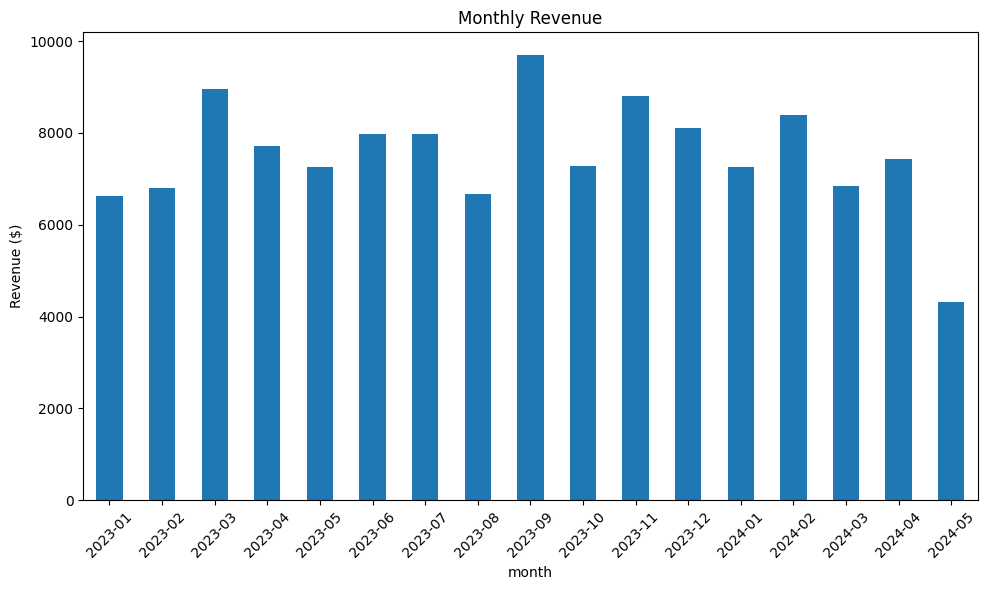

In [4]:
# Convert order_date to datetime and add helpful columns
data["order_date"] = pd.to_datetime(data["order_date"])
data["month"] = data["order_date"].dt.to_period("M")
data["day_of_week"] = data["order_date"].dt.day_name()

# Example: Revenue by month
monthly_revenue = data.groupby("month")["revenue"].sum()
print("Monthly Revenue:")
print(monthly_revenue)

# Plot monthly revenue
monthly_revenue.plot(kind="bar", figsize=(10,6), title="Monthly Revenue")
plt.ylabel("Revenue ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

---

## Business Questions

Now answer each of the following business questions. Use the starter code above as a reference, and expand your analysis to solve all questions.

### 1. Revenue Overview
What was the company's total revenue last quarter? Break it down by month.

Q4 Total Revenue: $ 24202.56
Q4 Revenue by Month:
order_date
2023-10    7287.27
2023-11    8795.85
2023-12    8119.44
Freq: M, Name: revenue, dtype: float64


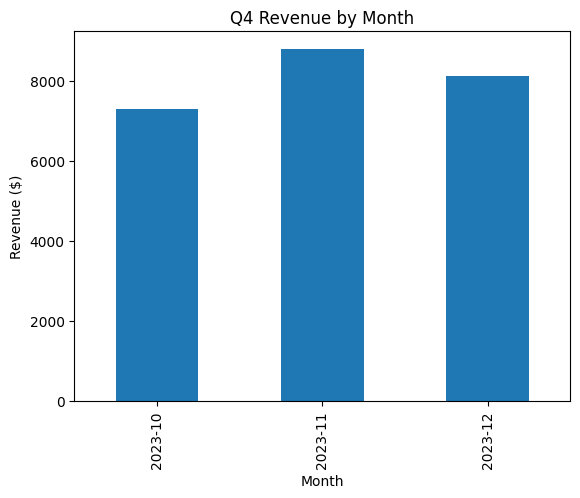

In [ ]:
# 1. Revenue Overview
# What was the company's total revenue last quarter? Break it down by month.

# Assuming "last quarter" is Q4 (Oct-Dec) of 2023
q4_data = data[(data['order_date'] >= '2023-10-01') & (data['order_date'] <= '2023-12-31')]
q4_total_revenue = q4_data['revenue'].sum()
q4_monthly_revenue = q4_data.groupby(q4_data['order_date'].dt.to_period('M'))['revenue'].sum()

print("Q4 Total Revenue: $", round(q4_total_revenue, 2))
print("Q4 Revenue by Month:")
print(q4_monthly_revenue)

# Visualization
q4_monthly_revenue.plot(kind='bar', title='Q4 Revenue by Month', ylabel='Revenue ($)', xlabel='Month')
plt.show()

#Novermber was the best performing month

### 2. Top Customers
Who are the top 5 customers by total revenue contribution?

In [ ]:
# 2. Top Customers
# Who are the top 5 customers by total revenue contribution?

top_customers = data.groupby('customer_id')['revenue'].sum().sort_values(ascending=False).head(5)
print("Top 5 Customers by Revenue:")
print(top_customers)

#The top five customers are listed below

Top 5 Customers by Revenue:
customer_id
62    4448.39
24    3369.44
90    2976.78
92    2838.74
97    2835.62
Name: revenue, dtype: float64


### 3. Segment Analysis
Which customer segment (Student, Professional, Senior) spends the most on average per order?

In [ ]:
# 3. Segment Analysis
# Which customer segment spends the most on average per order?

segment_avg = data.groupby('customer_segment')['revenue'].mean().sort_values(ascending=False)
print("Average Revenue per Order by Segment:")
print(segment_avg)

#Senior customers spent the most on average per order, by a large margin. Professionals were second, and students were third and are in the same ballpark.

Average Revenue per Order by Segment:
customer_segment
Senior          262.133925
Professional    255.652674
Student         253.812087
Name: revenue, dtype: float64


### 4. Regional Trends
Which region generated the highest revenue? Which region had the highest average order size?

In [ ]:
# 4. Regional Trends
# Which region generated the highest revenue? Which had the highest average order size?

region_revenue = data.groupby('region')['revenue'].sum().sort_values(ascending=False)
region_avg_order = data.groupby('region')['revenue'].mean().sort_values(ascending=False)

print("Revenue by Region:")
print(region_revenue)
print("\nAverage Order Size by Region:")
print(region_avg_order)

#The South region generated the highest revenue, and the highest average order size. Followed by the North region in both categories.

Revenue by Region:
region
South    34839.45
North    34351.69
East     31221.80
West     27727.73
Name: revenue, dtype: float64

Average Order Size by Region:
region
South    274.326378
North    258.283383
West     252.070273
East     240.167692
Name: revenue, dtype: float64


### 5. Product Category Performance
Which product category is most popular by quantity vs. by revenue?

In [ ]:
# 5. Product Category Performance
# Which product category is most popular by quantity vs. by revenue?

qty_by_category = data.groupby('product_category')['quantity'].sum().sort_values(ascending=False)
rev_by_category = data.groupby('product_category')['revenue'].sum().sort_values(ascending=False)

print("Most Popular by Quantity:")
print(qty_by_category)
print("\nMost Popular by Revenue:")
print(rev_by_category)

#Home products were the most popular by quantity and revenue. Clothing was second in Quantity but Electronics was second in revenue.

Most Popular by Quantity:
product_category
Home           269
Clothing       253
Sports         246
Electronics    239
Books          227
Name: quantity, dtype: int64

Most Popular by Revenue:
product_category
Home           29871.47
Electronics    25498.31
Clothing       24804.57
Books          24046.06
Sports         23920.26
Name: revenue, dtype: float64


### 6. Discount Effectiveness
Do discounted orders generate higher or lower revenue per order compared to non-discounted orders?

In [ ]:
# 6. Discount Effectiveness
# Do discounted orders generate higher or lower revenue per order compared to non-discounted orders?

discounted = data[data['discount_applied'] > 0]
non_discounted = data[data['discount_applied'] == 0]

avg_rev_discounted = discounted['revenue'].mean()
avg_rev_non_discounted = non_discounted['revenue'].mean()

print(f"Avg Revenue per Discounted Order: ${avg_rev_discounted:.2f}")
print(f"Avg Revenue per Non-Discounted Order: ${avg_rev_non_discounted:.2f}")

#Discounted orders generated higher revenue per order compared to non-discounted orders.

Avg Revenue per Discounted Order: $263.83
Avg Revenue per Non-Discounted Order: $248.30


### 7. Payment Method Usage
What percentage of orders use each payment method? Does any payment method correlate with higher spending?

In [ ]:
# 7. Payment Method Usage
# What percentage of orders use each payment method? Does any payment method correlate with higher spending?

method_counts = data['payment_method'].value_counts(normalize=True) * 100
avg_rev_by_method = data.groupby('payment_method')['revenue'].mean().sort_values(ascending=False)

print("Order Percentage by Payment Method:")
print(method_counts)
print("\nAverage Revenue by Payment Method:")
print(avg_rev_by_method)
#Credit Card is the most used payment method, followed Gift cards.
#But the highest average revenue per order comes from Debit Cards, followed by Credit Cards.

Order Percentage by Payment Method:
payment_method
Credit Card    27.4
Gift Card      24.8
Debit Card     24.6
PayPal         23.2
Name: proportion, dtype: float64

Average Revenue by Payment Method:
payment_method
Debit Card     275.980650
Credit Card    257.444234
Gift Card      254.362500
PayPal         236.071034
Name: revenue, dtype: float64


### 8. Seasonality Check
Plot revenue by day of week — are weekends busier than weekdays?

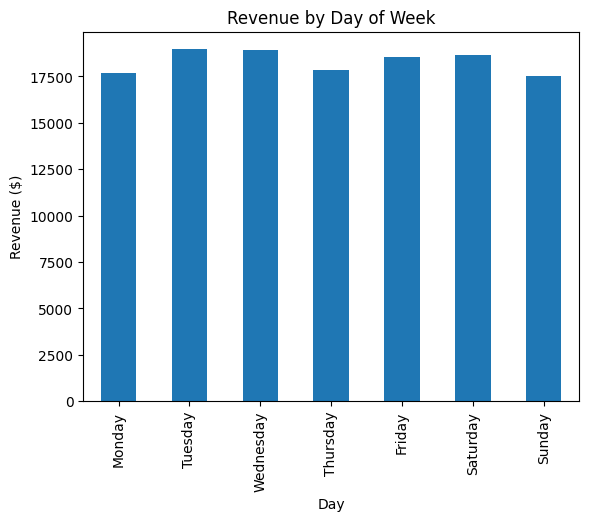

In [ ]:
# 8. Seasonality Check
# Plot revenue by day of week — are weekends busier than weekdays?

dow_revenue = data.groupby('day_of_week')['revenue'].sum()
# Ensure correct weekday order
dow_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dow_revenue = dow_revenue.reindex(dow_order)

dow_revenue.plot(kind='bar', title='Revenue by Day of Week', ylabel='Revenue ($)', xlabel='Day')
plt.show()

#It appears that Tuesdays and Wednesdays are highest with Sunday being the slowest

### 9. Profitability (Stretch)
Assume profit margin = 20% of revenue. Estimate total profit and identify the most profitable region.

In [ ]:
# 9. Profitability (Stretch)
# Assume profit margin = 20% of revenue. Estimate total profit and identify the most profitable region.

data['profit'] = data['revenue'] * 0.20
total_profit = data['profit'].sum()
profit_by_region = data.groupby('region')['profit'].sum().sort_values(ascending=False)

print(f"Estimated Total Profit: ${total_profit:.2f}")
print("Profit by Region:")
print(profit_by_region)

#The total estimated profit is 25628.134 and South is the most profitable region.

Estimated Total Profit: $25628.13
Profit by Region:
region
South    6967.890
North    6870.338
East     6244.360
West     5545.546
Name: profit, dtype: float64


### 10. Business Recommendation
Based on your findings, recommend one strategy (e.g., focus on certain customer segments, increase discounts, promote specific regions/products).

**Your recommendation here:**

Write your analysis and recommendation based on the insights you discovered from the data.

Focus on Senior Customers:
Since senior customers spend the most per order, consider targeted marketing campaigns, loyalty programs, or exclusive offers for this segment to further increase their engagement and spending.

Leverage the South Region:
The South region leads in both total revenue and average order size. Invest in regional promotions, faster shipping, or localized advertising to strengthen your presence and maximize returns in this area.

Promote Home Products:
Home products are the top category by both quantity and revenue. Feature these products more prominently on your website, bundle them with related items, or offer limited-time deals to boost sales even further.

Optimize Discount Strategies:
Discounted orders yield higher revenue per order. Consider running more targeted discount campaigns, especially around high-performing months like November, to drive larger purchases.

Encourage Debit Card Usage:
While Credit Cards are most used, Debit Card transactions have the highest average revenue per order. Offer incentives (e.g., small discounts or rewards points) for customers who pay with Debit Cards to increase high-value transactions.

Capitalize on Weekly Trends:
Since Tuesdays and Wednesdays are the busiest days, schedule major promotions, product launches, or email campaigns early in the week to maximize impact.

Prepare for November Peaks:
November is the best-performing month. Plan inventory, marketing, and logistics in advance to take full advantage of this seasonal spike.



---

## Submission Requirements

1. **Complete code** for all 10 questions
2. **Clear visualizations** where appropriate  
3. **Brief interpretation** of each result
4. **Final business recommendation** with supporting data

Remember: Focus on what the numbers tell us about the business, not just the calculations themselves.